In [1]:
# Ignorer les avertissements
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos

# Quel type de problème dois-je traiter : Il s'agit ici d'un problème de prédiction, par apprentissage supervisé.
La valeur à prédire est réelle.

In [2]:
df = pd.read_csv("./data/velo.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
df.isnull().sum()  # Pas de valeur nulle dans notre jeu de données, donc pas d'imputation nécessaire.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Exploration
Maintenant, nous pouvons explorer nos variables. Premièrement, explorons la distribution des diverses variables discrètes comme le temps, la saison, etc ....

In [5]:
# considérons la saison.
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

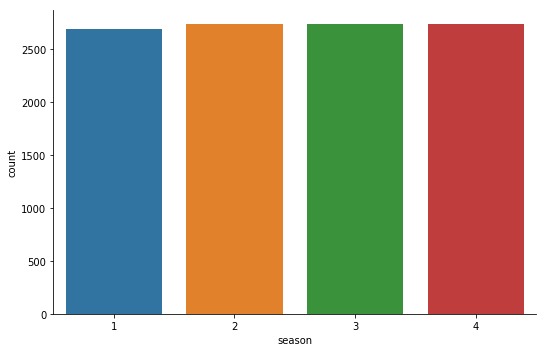

In [6]:
#sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)
sns.catplot(x='season',data=df,kind='count',height=5,aspect=1.5)

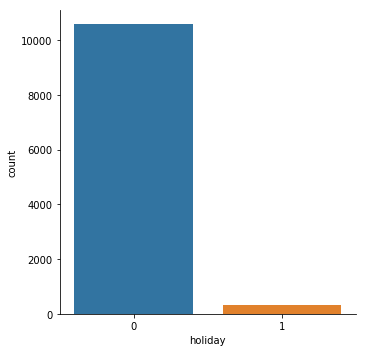

In [7]:
#holiday
df.holiday.value_counts()
sns.catplot(x='holiday',data=df,kind='count',height=5,aspect=1)

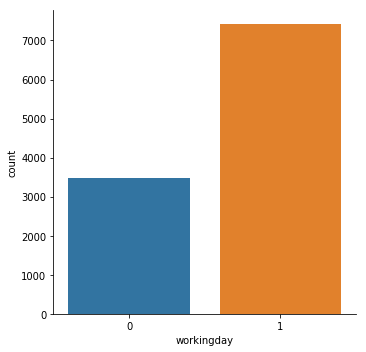

In [8]:
#workingday
df.workingday.value_counts()
sns.catplot(x='workingday',data=df,kind='count',height=5,aspect=1)

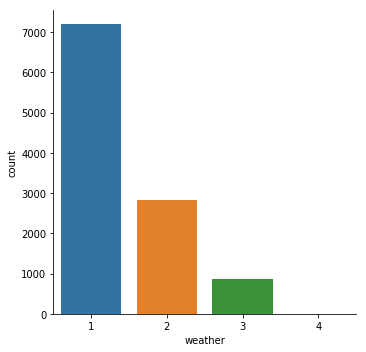

In [9]:
#weather
df.weather.value_counts()
sns.catplot(x='weather',data=df,kind='count',height=5,aspect=1)  
# 1-> Dégagé à nuageux
# 2-> Brouillard
# 3-> Légère pluie ou neige
# 4-> Fortes averses ou neiges

In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


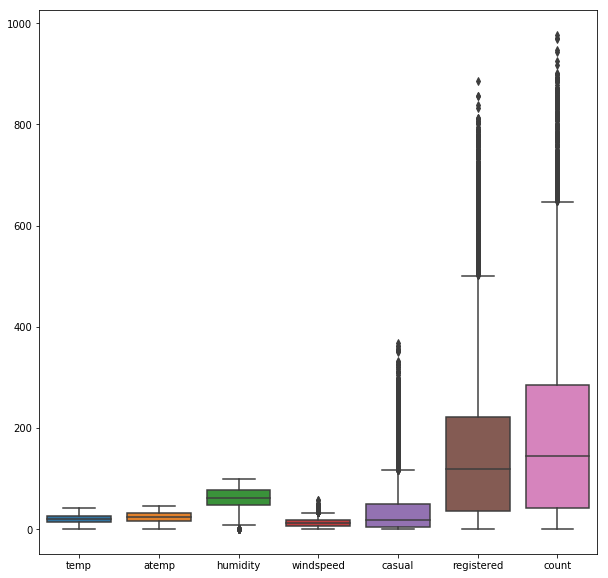

In [11]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

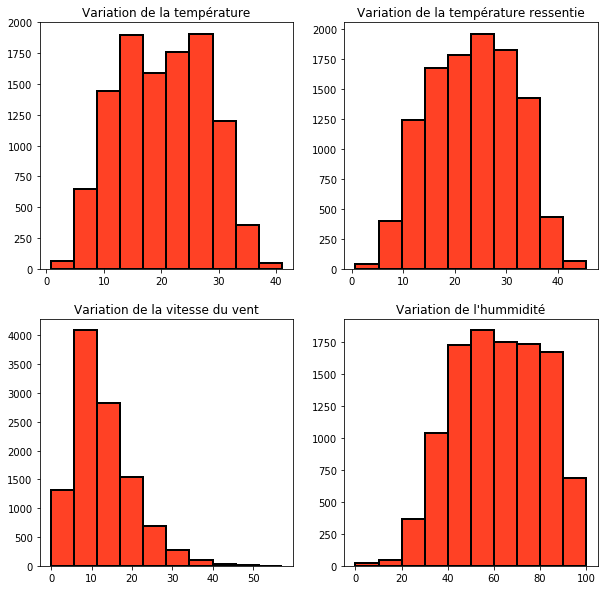

In [12]:
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation de la température")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation de la température ressentie")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation de la vitesse du vent")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation de l'hummidité")
fig.set_size_inches(10,10)

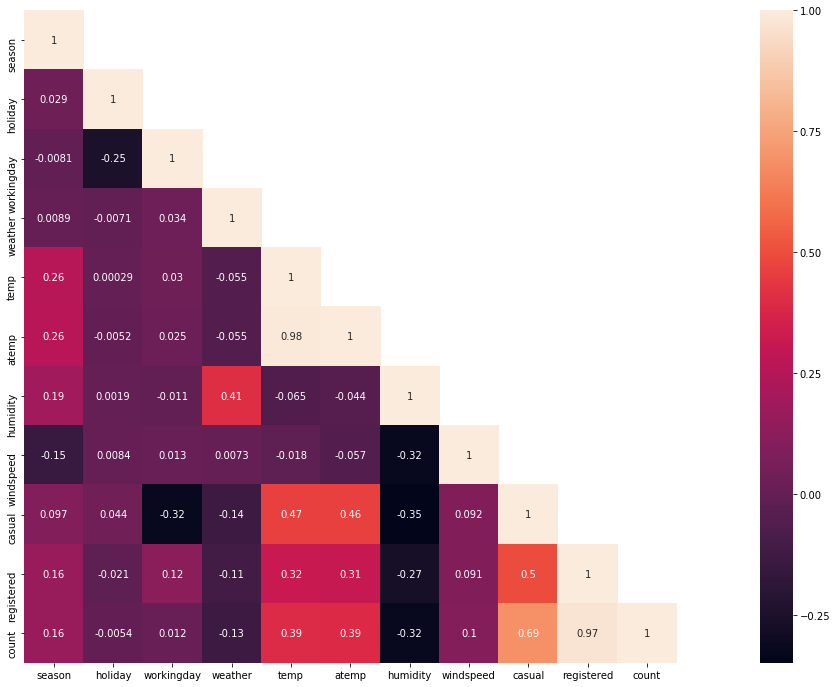

In [13]:
#Matrice de corrélation.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Analyse de la matrice de corrélation (HeatMap) ci dessus :

* *temp* et *atemp* sont très liés comme prévu.

* L'humidité *(humidity)* est inversement proportionnelle au nombre total de locations de vélos *(count)*, car quand le  temps est humide, les gens n'aiment pas voyager à vélo.

* Le nombre de locations d'usagers non abonnés *(casual)* et le jour travaillé ou pas *(workingday)* sont très inversement liés, comme on peut s'y attendre.

* Nous notons également que la température *temp (ou atemp)* influe fortement sur le nombre total de locations de vélos *(count)*.

* Notons également que la météo *(weather)* et le nombre total de locations de vélos *(count)* sont très inversement liés. C’est une bonne donnée, car les conditions météorologiques augmentent de (1 à 4), ce qui signifie que plus les conditions météorologiques s’aggravent, moins de gens louent des vélos.

* Enregistrés/occasionnels *(registered/casual)* et le nombre total de locations de vélos *(count)* sont très liés, ce qui indique que la plupart des vélos loués sont enregistrés.

* De même, nous pouvons tirer d'autres conclusions comme le temps qu'il fait, l'humidité, etc.

# Features engineering
Nous allons procéder à la transformation de certaines variables afin d'obtenir de nouvelles
variables pertinentes ou moins pertinentes.

Dans l'optique d'améliorer les fonctionnalités, séparons selon les valeurs les variables suivantes :
* *season,*
* *weather*

Chacune de cesvariables possèdent 04 modalités distinctes.

In [14]:
#season
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
#weather
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0


In [15]:
# Nous pouvons maintenant supprimer les variables weather et season.
df.drop(['season','weather'],inplace=True,axis=1)
df.head(2)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0


Maintenant, nous allons segmenter la date et l’heure car il est prévu que l’heure de la journée affecte le nombre total de locations de vélos *(count)*. par exemple, aux heures de bureau comme tôt le matin ou le soir, on peut s'attendre à une plus forte demande de vélos à location .

In [16]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)] 
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,4,5,1,0


Important : 
Notre modèle fonctionne avec les jours de la semaine:
* 1 : Lundi,
* 2 : Mardi,
* 3 : Mercredi,
* 4 : Jeudi,
* 5 : Vendredi,
* 6 : Samedi,
* 0 : Dimanche.

In [17]:
# Nous pouvons maintenant supprimer la variable datetime.
df.drop('datetime',axis=1,inplace=True)
df.head(2)

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,5,1,0


Regardons maintenant les corrélations entre les nouvelles Variables (Features)

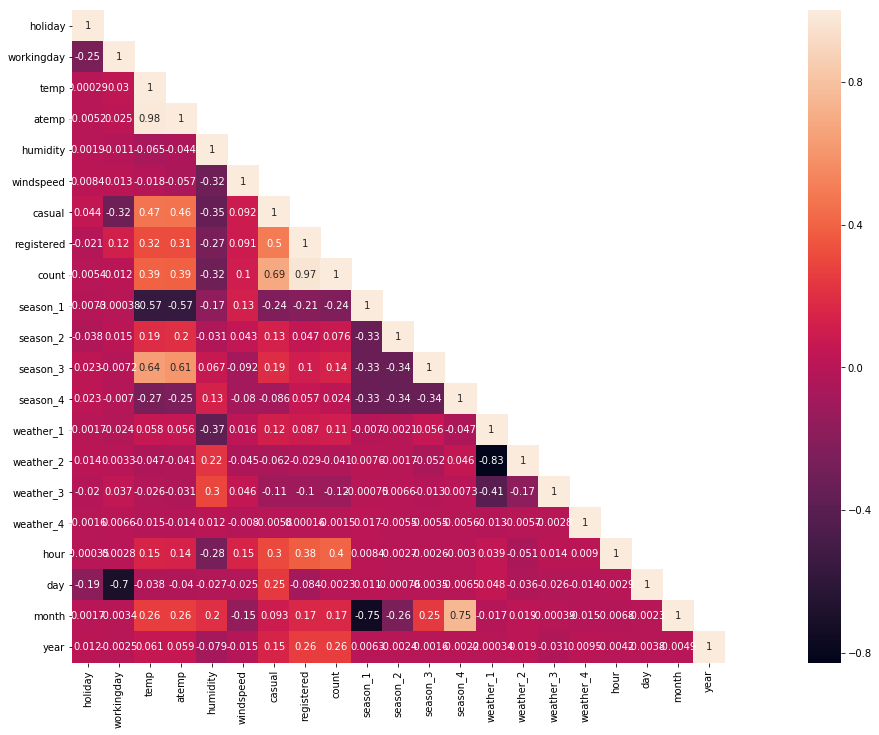

In [18]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

L'analyse de la matrice de corrélation (HeatMap) ci dessus montre que les features suivantes sont trop explicatives:

* *casual* : correlé à ~ 70% avec le nombre total de locations de vélos *(count)*
* *registered* : correlé à ~ 97% avec le nombre total de locations de vélos *(count)*

Nous procédons donc à la suppression de ces variables.

In [19]:
df.drop(['casual','registered'],axis=1,inplace=True)
df.head(3)

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0


### Voyons maintenant comment le nombre total de locations de vélos (count) varie selon les variables

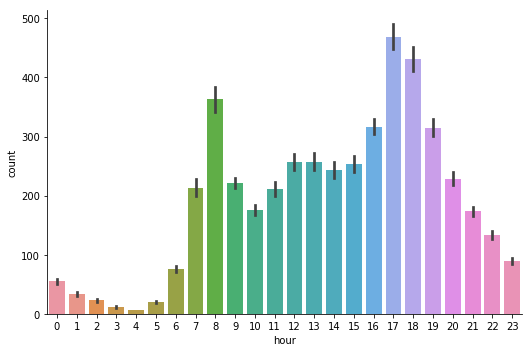

In [20]:
# avec la variable hour
sns.catplot(x="hour",y="count",data=df,kind='bar',height=5,aspect=1.5)

Nous observons que les picks de demande les plus élévés se situent de 7 à 10 heures et de 15 à 19 heures. 
dans la plupart des villes métropolitaines, c’est l’heure de pointe pour les bureaux et plus de gens louent des vélos.
ce n'est qu'une des raisons plausibles.

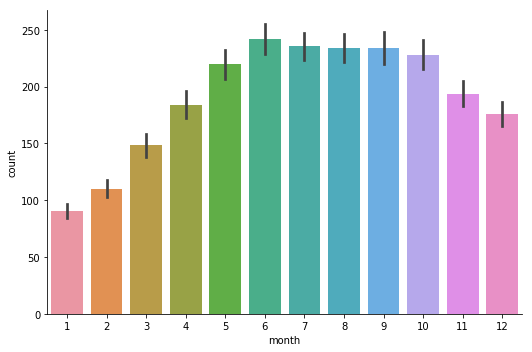

In [21]:
# avec la variable month
sns.catplot(x="month",y="count",data=df,kind='bar',height=5,aspect=1.5)

Notons que le mois affecte la saison et que les gens prennent le vélo ou non. En fonction des conditions climatiques : Dégagé à nuageux, Brouillard, etc ...

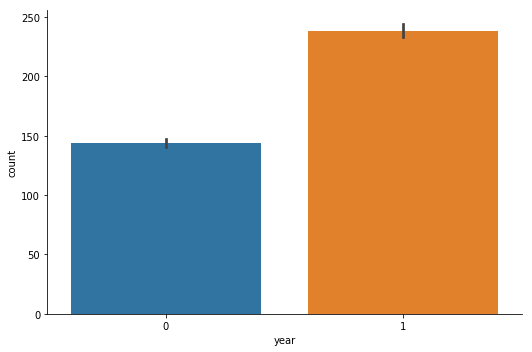

In [22]:
# avec la variable year
sns.catplot(x="year",y="count",data=df,kind='bar',height=5,aspect=1.5)

Nous constatons que le nombre total de locations de vélos (count) a donc augmenté entre 2011 et 2012:
* 0 pour 2011,
* 1 pour 2012.

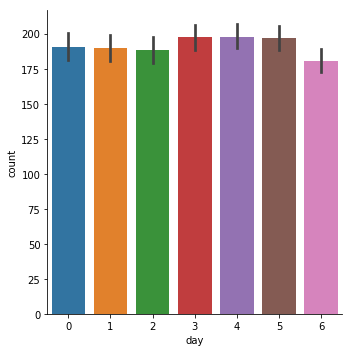

In [23]:
# avec la variable day
sns.catplot(x="day",y='count',kind='bar',data=df,height=5,aspect=1)

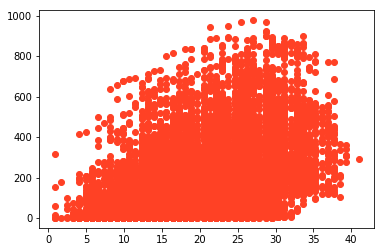

In [24]:
# avec la variable temp
plt.scatter(x="temp",y="count",data=df,color='#ff4125')

Notons que de cette façon, il est difficile de visualiser. un meilleur moyen est de convertir la variable *temp* en intervalles ou «bacs», puis de la traiter comme une variable discrète.

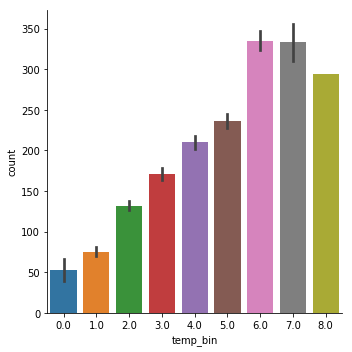

In [25]:
new_df=df.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.catplot(x="temp_bin",y="count",data=new_df,kind='bar')

Nous remarquons que la demande est la plus forte pour les casiers 6 et 7, 
ce qui correspond aux températures 30 à 35 (cas 6) et 35 à 40 (cas 7).

### Après avoir procédé aux phases d'exploration de données, d'analyse, de visualisation et de pré-traitement, nous pouvons passer à la modélisation.

In [26]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month',
        'year'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

Afin de conserver l'ordre chronologique et la stabilité dans le jeu de données, nous allons procéder au classement de ces dernières. Classement par date, du tuple le plus ancien au plus récent, en tenant compte du poids des éléments temporels dans le tri *(hour-->day-->month-->year)*, à savoir trier séquentiellement et par ordre ascendant les variables suivantes :
* L'heure *(hour),*
* Le jour *(day),*
* Le mois *(month),*
* L'année *(year).*

In [27]:
df = df.sort_values(by=['year','month','day','hour'], ascending=[1,1,1,1])

In [28]:
#importer les algorithmes de modélisation nécessaires.

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

#selection des modèles
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation des métriques
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # Pour la regression

Segmentation du jeu de données déjà trié en train et test :
* 80% pour le train,
* 20% pour le test.

Observations dans le jeu de données : 10886
Observations du Training : 8708
Observations du test: 2178


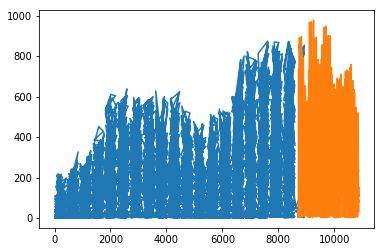

In [29]:
len(df)
train_size = int(len(df) * 0.80)
x_train, x_test = df[0:train_size], df[train_size:len(df)]
y_train, y_test = (df['count'])[0:train_size], (df['count'])[train_size:len(df)]
print('Observations dans le jeu de données : %d' % (len(df)))
print('Observations du Training : %d' % (len(x_train)))
print('Observations du test: %d' % (len(x_test)))
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_test])
plt.show()

x_train.drop(['count'],inplace=True,axis=1)
x_test.drop(['count'],inplace=True,axis=1)

Comme le montre le plot ci dessus,notre jeu de données a bien été séparé en deux ensemble (**train[80%] -- bleu** et **test[20%] -- Orange**) tout en conservant **l'ordre temporel des observations**.

Nous utiliserons les algorithmes suivants :
* GradientBoostingRegressor(),
* DecisionTreeRegressor(), 
* LinearRegression(),
* RandomForestRegressor(),
* AdaBoostRegressor(),
* BaggingRegressor(),
* SVR(),
* KNeighborsRegressor()

Nous aurions pu utiliser d'autres algorithmes de modélisation comme *RIDGE* et *RIDGECV*, mais le problème est que ces
modèles prédisent souvent des valeurs négatives pour la cible *(le nombre total de locations de vélos [count])*, ce qui n'est pas possible dans notre cas d'études.

In [30]:
alpha = 0.99
models=[GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9),DecisionTreeRegressor(), LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['GradientBoosting','DecisionTree','LinearRegression','RandomForest','AdaBoost','Bagging','SVR','KNeighborsRegressor']
rmsle=[]

d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    
    
    
rmsle_frame=pd.DataFrame({'Algorithme':model_names,'RMSLE':rmsle})
rmsle_frame.sort_values(by=['RMSLE'], ascending=[1])

,Algorithme,RMSLE
5,Bagging,0.360411
3,RandomForest,0.361429
1,DecisionTree,0.510387
7,KNeighborsRegressor,0.827958
4,AdaBoost,0.911163
2,LinearRegression,1.223278
0,GradientBoosting,1.301374
6,SVR,1.331699


La variable cible étant une variable continue, nous avons utilisés une métrique d'évaluation des modèles linéaires.
Nous avons choisis d'utiliser le *mean_squared_log_error (Dans notre cas, retourne Une valeur en virgule flottante non négative (la meilleure valeur est 0,0) pour chaque cible)*. Nous aurions pu utiliser d'autres métriques à linstar de :
* explained_variance,	 
* neg_mean_absolute_error,	 
* neg_mean_squared_error,  
* neg_median_absolute_error,	 
* r2.

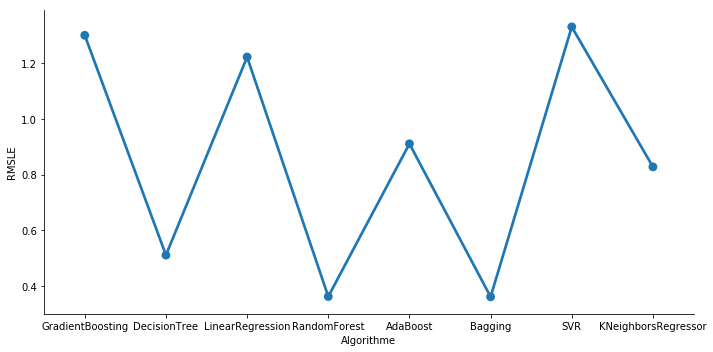

In [31]:
sns.catplot(x='Algorithme',y='RMSLE',data=rmsle_frame,kind='point',height=5,aspect=2)

Les modèles suivants possèdent le RMSLE les plus bas :
* Bagging 	    0.360411
* RandomForest 	0.361429

Notons que plus cette métrique est proche de 0.0,meilleur le modèle de régression est. 
Nous allons éssayer d'améliorer les performances du RamdomForest (éssayer de rapprocher de 0.0 la métrique RMSLE pour ce modèle) en recherchant la valeur optimale de ses hyper paramètres (*n_estimators*, *max_features*) 

In [32]:
alg = []
score = []
bp = []
#Pour RandomForestRegressor.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
alg.append('RandomForestRegressor')
score.append(np.sqrt(mean_squared_log_error(pred,y_test)))
bp.append(clf_rf.best_params_)

# Pour KNN (KNeighborsRegressor)
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

alg.append('KNeighborsRegressor')
score.append(np.sqrt(mean_squared_log_error(pred,y_test)))
bp.append(clf_knn.best_params_)

o_rmsle_frame=pd.DataFrame({'Algorithme':alg,'RMSLE':score,'Best_params':bp})
o_rmsle_frame.sort_values(by=['RMSLE'], ascending=[1])

0.8279584381351398


,Algorithme,RMSLE,Best_params
0,RandomForestRegressor,0.338949,"{'max_features': 'auto', 'n_estimators': 500, ..."
1,KNeighborsRegressor,0.827958,"{'n_jobs': -1, 'n_neighbors': 5}"


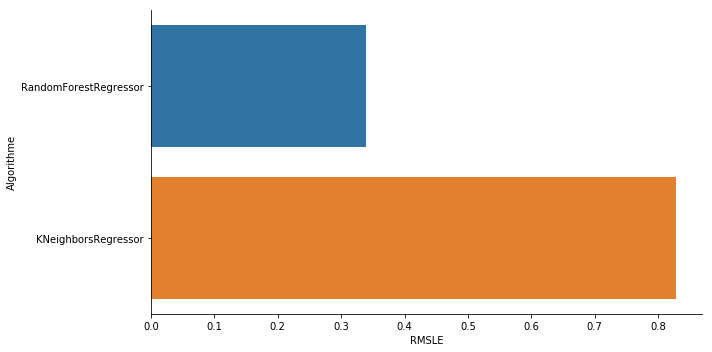

In [33]:
sns.catplot(y='Algorithme',x='RMSLE',data=o_rmsle_frame,kind='bar',height=5,aspect=2)

Maintenant, le modèle **RandomForestRegressor** possède le **RMSLE** le plus proche de 0.0 (**0.338949**), il apparaît comme étant notre meilleur modèle.